# RIDGE, LASSO, ELASTICNET

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn import datasets

In [3]:
diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

In [4]:
# X

In [5]:
# y

In [6]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
X.shape

(442, 10)

In [8]:
y.shape

(442,)

## RIDGE REGRESSION

In [9]:
from sklearn.preprocessing import StandardScaler
#Scaling is needed for regularized data.

In [10]:
from sklearn.linear_model import Ridge

In [11]:
#Find Ridge coefficients for different alpha values.
n_alphas = 50
ridge_alphas = np.linspace(0, 10**5, n_alphas)

#Scale the data.
X_new = StandardScaler().fit_transform(X)

ridge_coefs = []

for i in ridge_alphas:
    ridge = Ridge(alpha=i)
    ridge.fit(X_new, y)
    ridge_coefs.append(ridge.coef_)

In [12]:
# for a in ridge_coefs:
#     print(a)

The more alpha is increased the more regualarization is applied. Regularization means lower values of weights i.e the coefficients. So as alpha is increased, the coefficient values will decrease and their effect on regression will decrease.

<IPython.core.display.Javascript object>


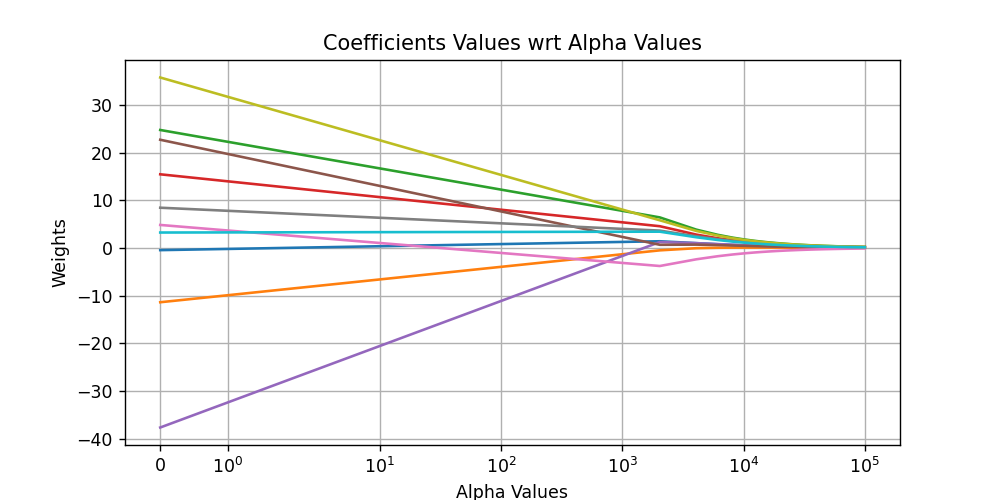

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.figure(1, figsize=(8,4)) 
plt.plot(ridge_alphas, ridge_coefs)
plt.xlabel('Alpha Values')
plt.ylabel('Weights')
plt.title('Coefficients Values wrt Alpha Values')
plt.xscale('symlog')
plt.grid()
plt.show()

In [14]:
#Try Ridge Regression for different alpha values.
alpha_values=[0.1, 1, 10, 100, 1000, 10000]

for i in alpha_values:
    ridge= Ridge(alpha=i)
    ridge.fit(X_new, y)
    
    print("New weights for alpha = ",i,"\n")
    print(ridge.coef_,"\n\n")

New weights for alpha =  0.1 

[ -0.47092377 -11.39879624  24.73277038  15.42329093 -36.74536995
  21.93458358   4.39326057   8.30972208  35.38006584   3.22223832] 


New weights for alpha =  1 

[ -0.43127609 -11.33381407  24.77096198  15.37375716 -30.08858903
  16.65328714   1.46208255   7.5211415   32.84392268   3.26632702] 


New weights for alpha =  10 

[ -0.25803231 -10.93649943  24.59985026  15.09467914 -11.29558784
   1.80868899  -6.56189972   5.60043007  25.33215086   3.52286532] 


New weights for alpha =  100 

[ 0.43610039 -8.43315321 21.37645985 13.33709639 -2.06651069 -3.70737476
 -8.97598227  5.72284121 18.65148552  4.73037067] 


New weights for alpha =  1000 

[ 1.60035576 -1.66782798  9.9272203   6.81865096  1.0755306   0.04333795
 -5.47133667  4.7703305   8.72456226  4.56476186] 


New weights for alpha =  10000 

[ 0.52129205  0.05651612  1.78474882  1.32343459  0.55870709  0.43047337
 -1.16448338  1.22708811  1.69095736  1.10692527] 




The weight values were decreased when alpha values were increased as expected. The new weight values get very close to but never becomes 0. 

## LASSO REGRESSION 

In [15]:
from sklearn.linear_model import Lasso

In [16]:
#Find Lasso coefficients for different alpha values.
n_alphas = 50
lasso_alphas = np.linspace(0, 100, n_alphas)

#Scale the data.
X_new = StandardScaler().fit_transform(X)

lasso_coefs = []

for i in lasso_alphas:
    lasso = Lasso(alpha=i)
    lasso.fit(X_new, y)
    lasso_coefs.append(lasso.coef_)

In [17]:
# for a in lasso_coefs:
#     print(a)

<IPython.core.display.Javascript object>


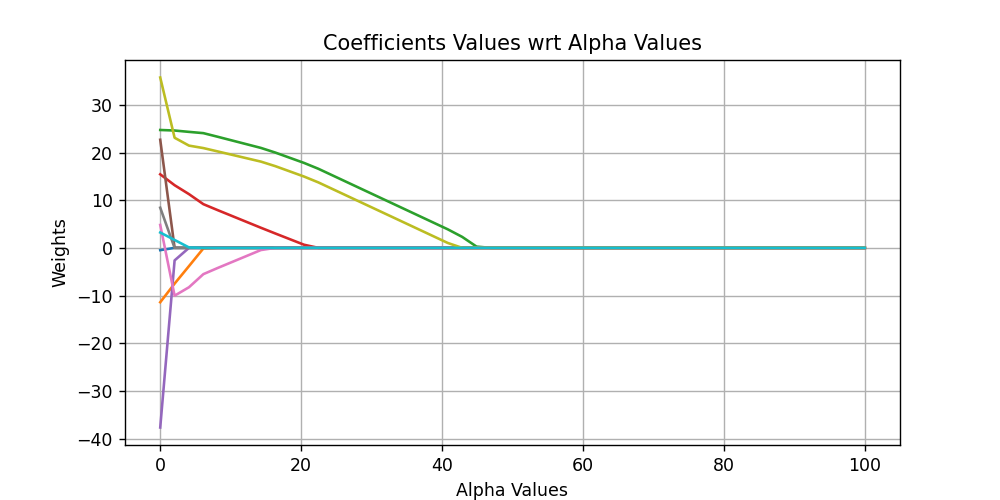

In [18]:
# Show LASSO paths   
plt.figure(1, figsize=(8,4))    
plt.plot(lasso_alphas, lasso_coefs)
plt.xlabel('Alpha Values')
plt.ylabel('Weights')
plt.title('Coefficients Values wrt Alpha Values')
plt.grid()
plt.show()

In [19]:
#Try Lasso Regression for different alpha values.
alphas = [0.01, 0.1, 10, 15, 25, 30, 45]
for i in alphas:
    lasso= Lasso(alpha=i)
    lasso.fit(X_new, y)

    print("New weights for alpha = ",i,"\n")
    print(lasso.coef_,"\n\n")

New weights for alpha =  0.01 

[ -0.45329589 -11.38623054  24.73579603  15.40793784 -36.0528232
  21.42435332   4.02990004   8.13665648  35.14782214   3.21322148] 


New weights for alpha =  0.1 

[ -0.27779517 -11.15964481  24.8549091   15.24242455 -26.44833333
  13.72578524  -0.           7.05563429  31.57522314   3.15841935] 


New weights for alpha =  10 

[ 0.         -0.         22.60022294  6.80138044 -0.         -0.
 -3.08806532  0.         19.58596398  0.        ] 


New weights for alpha =  15 

[ 0.00000000e+00 -0.00000000e+00  2.06936413e+01  3.78904809e+00
  0.00000000e+00  0.00000000e+00 -2.01742961e-02  0.00000000e+00
  1.78446796e+01  0.00000000e+00] 


New weights for alpha =  25 

[ 0.          0.         14.82287965  0.          0.          0.
 -0.          0.         11.96291929  0.        ] 


New weights for alpha =  30 

[ 0.          0.         11.3654188   0.          0.          0.
 -0.          0.          8.50549535  0.        ] 


New weights for alpha =  

## ELASTIC-NET REGRESSION

In [20]:
from sklearn.linear_model import ElasticNet

In [21]:
#Find ElasticNet coefficients for different alpha values.
n_alphas = 50
elasticNet_alphas = np.linspace(0, 100, n_alphas)

#Scale the data.
X_new = StandardScaler().fit_transform(X)

elasticNet_coefs = []

for i in elasticNet_alphas:
    eNet = ElasticNet(alpha=i, l1_ratio=0.5)
    eNet.fit(X_new, y)
    elasticNet_coefs.append(eNet.coef_)

<IPython.core.display.Javascript object>


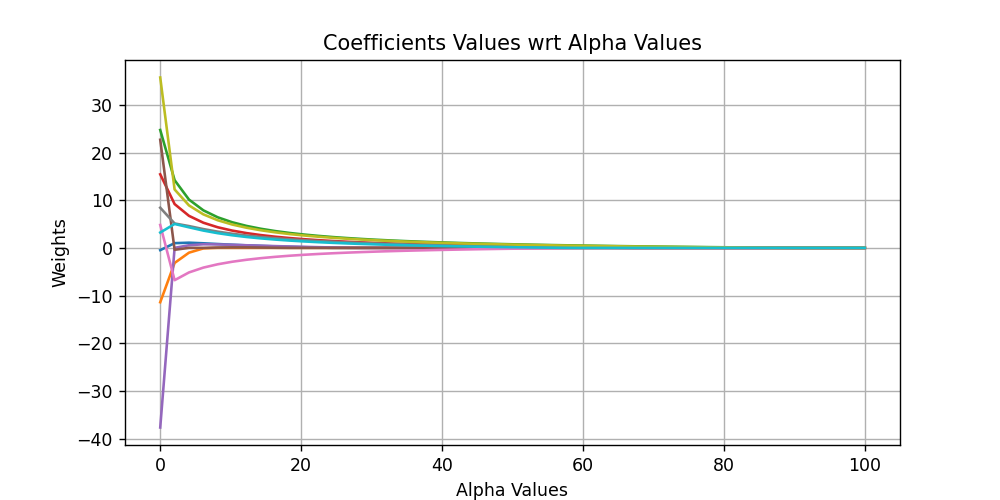

In [22]:
# Show ElasticNet paths   
plt.figure(1, figsize=(8,4))    
plt.plot(elasticNet_alphas, elasticNet_coefs)
plt.xlabel('Alpha Values')
plt.ylabel('Weights')
plt.title('Coefficients Values wrt Alpha Values')
plt.grid()
plt.show()

In [23]:
#Try ElasticNet Regression for different alpha values.
alphas = [0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
for i in alphas:
    eNet= ElasticNet(alpha=i, l1_ratio=0.5)
    eNet.fit(X_new, y)

    print("New weights for alpha = ",i,"\n")
    print(eNet.coef_,"\n\n")

New weights for alpha =  0.1 

[ -0.06450966 -10.44169752  24.131291    14.75251583  -6.39435385
  -1.73433665  -8.41018002   5.20382877  22.94137958   3.72439119] 


New weights for alpha =  1 

[ 0.63790417 -5.692008   18.09718512 11.40560381 -0.24133825 -2.36650765
 -8.22156943  5.29729713 15.44841927  5.05741588] 


New weights for alpha =  5 

[ 1.03893428 -0.52197867  8.97279872  5.98360681  0.68814198  0.
 -4.65077109  4.27829687  7.94617386  3.98586079] 


New weights for alpha =  10 

[ 0.67304872 -0.          5.46648681  3.6877843   0.64752638  0.10657792
 -2.96112556  2.99960568  4.97637363  2.67827224] 


New weights for alpha =  20 

[ 0.15239791  0.          2.85413123  1.8629145   0.22683131  0.
 -1.4888435   1.63809593  2.65137732  1.37944883] 


New weights for alpha =  30 

[ 0.          0.          1.75181549  1.06118277  0.          0.
 -0.81315039  0.95172413  1.63231739  0.74875599] 


New weights for alpha =  40 

[ 0.          0.          1.13910674  0.60798901 

## K-Fold Cross Validation for Lasso

In [24]:
from sklearn.linear_model import LassoCV

In [25]:
n_alphas = 100
lasso_alphas = np.linspace(0, 10, n_alphas)

X_new = StandardScaler().fit_transform(X)

foldCount = 10
lassocv = LassoCV(cv=foldCount, alphas=lasso_alphas, random_state=0)
lassocv.fit(X_new, y)

LassoCV(alphas=array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303...
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96969697,
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
        cv=10, random_sta

In [26]:
# print the best result
print("Best alpha =", lassocv.alpha_,"\n\n")

print("Coefficients got from the best alpha:\n", lassocv.coef_,"\n\n")

print("Best R^2 score =", lassocv.score(X_new, y),"\n\n")

Best alpha = 1.2121212121212122 


Coefficients got from the best alpha:
 [ -0.          -8.94813649  24.7867515   13.89572275  -4.38877934
  -0.         -10.50221905   0.          24.15081888   2.37719427] 


Best R^2 score = 0.5126751998810162 




## Polynomial Regression with ElasticNet

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNetCV

In [28]:
# use 10 fold cross-validation to find best alpha
n_alphas = 100
lasso_alphas = np.linspace(0, 10, n_alphas)

polynomOrder = 2;
X_poly = PolynomialFeatures(polynomOrder).fit_transform(X)
X_new = StandardScaler().fit_transform(X_poly)

foldCount = 10
enet = ElasticNetCV(cv=foldCount, alphas=lasso_alphas, fit_intercept=True, max_iter=10000, random_state=0)
enet.fit(X_new, y)

ElasticNetCV(alphas=array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.030...
        7.07070707,  7.17171717,  7.27272727,  7.37373737,  7.47474747,
        7.57575758,  7.67676768,  7.77777778,  7.87878788,  7.97979798,
        8.08080808,  8.18181818,  8.28282828,  8.38383838,  8.48484848,
        8.58585859,  8.68686869,  8.78787879,  8.88888889,  8.98989899,
        9.09090909,  9.19191919,  9.29292929,  9.39393939,  9.49494949,
        9.5959596 ,  9.6969697 ,  9.7979798 ,  9.8989899 , 10.        ]),
             cv=10, max_iter=10000, random_state=0)

In [29]:
# print the best result
print("Best alpha =", enet.alpha_,"\n\n")

print("Coefficients got from the best alpha:\n", enet.coef_,"\n\n")

print("Best R^2 score =", enet.score(X_new, y),"\n\n")

Best alpha = 0.40404040404040403 


Coefficients got from the best alpha:
 [ 0.00000000e+00  2.07221792e+00 -4.49587734e+00  1.95208656e+01
  1.34235842e+01 -7.89476043e-01 -2.93567594e+00 -9.21013703e+00
  6.06889309e+00  1.89121328e+01  4.50330399e+00  2.74856024e+00
  5.86482584e+00 -5.87101144e-01  1.81270303e+00 -3.36127334e-01
 -3.52476883e+00  1.91793077e+00  0.00000000e+00  3.36324582e+00
  1.83262859e+00 -4.49587239e+00  2.22448715e+00  2.81557251e+00
  2.00837374e-01 -1.14734414e+00  3.11145989e+00 -8.19499299e-01
  1.76892930e-03  8.18940246e-01  3.74463966e+00  5.56100179e+00
 -1.26285271e+00 -7.00769390e-01  1.95437210e-02 -0.00000000e+00
  2.12943145e-01  1.27591725e+00  1.04219782e-01  1.18244650e+00
  7.22533219e-01  1.65928956e+00 -1.08927176e+00  5.83515926e-01
 -2.77692244e+00  2.74157164e-02  3.42877904e-01  1.13839526e+00
 -3.07066518e+00 -6.66237660e-01  6.13596126e-02 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.37905991e+00  5.39415060e-01
 -0.00000000e+0